# Assignment 5

Text identification using OpenCV, Tesseract (OCR) and deep neural network  

Installing and Importing Necessary Libraries

In [1]:
!apt-get install -y tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [2]:
import cv2
import numpy as np
import pytesseract
from google.colab.patches import cv2_imshow
from google.colab import files
import os


Preprocessing the Image

In [3]:
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    denoised = cv2.fastNlMeansDenoising(gray)
    thresh = cv2.threshold(denoised, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    return thresh

Detecting Text Regions

In [4]:
def detect_text_regions(image):
    boxes = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)
    return boxes

Drawing Bounding Boxes

In [5]:
def draw_bounding_boxes(image, boxes):
    output = image.copy()
    n_boxes = len(boxes['level'])
    for i in range(n_boxes):
        if int(boxes['conf'][i]) > 60:
            (x, y, w, h) = (boxes['left'][i], boxes['top'][i], boxes['width'][i], boxes['height'][i])
            cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return output

Extracting Detected Text

In [6]:
def get_detected_text(boxes):
    detected_text = []
    n_boxes = len(boxes['level'])
    for i in range(n_boxes):
        if int(boxes['conf'][i]) > 60:
            detected_text.append(boxes['text'][i])
    return ' '.join(detected_text)

Reading the image

In [7]:
image_path = "/content/text identification.jpg"

image = cv2.imread(image_path)

Processing and Displaying Results


Original Image:


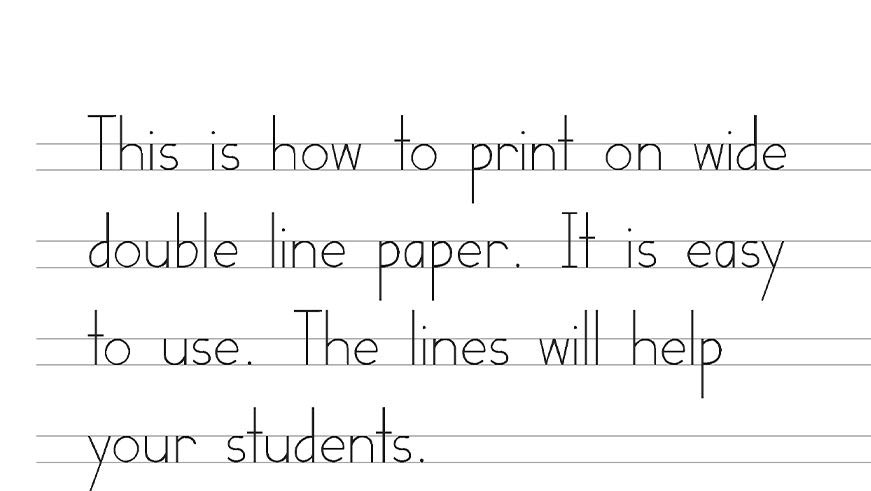


Image with Text Detection Regions:


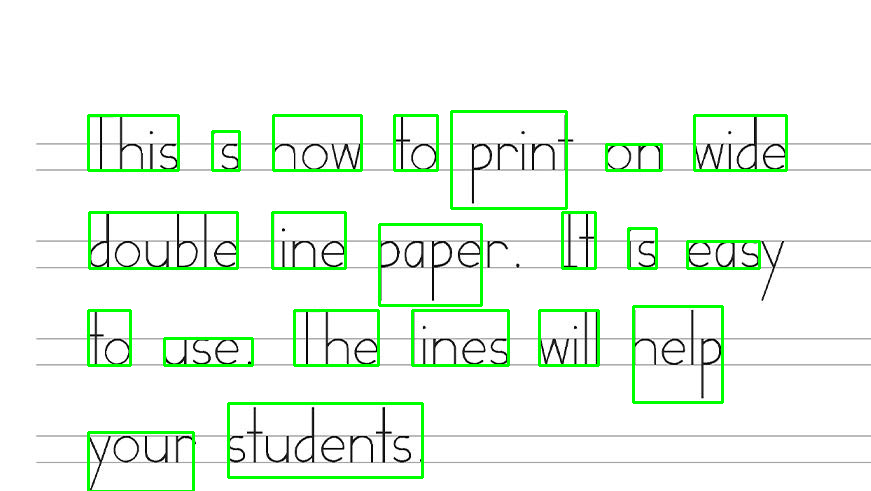


Detected Text:
This is how to print on wide double line paper It is eas to use. The lines will help your students.


In [8]:

if image is None:
    print(f"Error: Unable to read the image file: {image_path}")
else:

    print("\nOriginal Image:")
    cv2_imshow(image)

    preprocessed = preprocess_image(image)
    boxes = detect_text_regions(preprocessed)


    image_with_boxes = draw_bounding_boxes(image, boxes)

    # Display the image with bounding boxes
    print("\nImage with Text Detection Regions:")
    cv2_imshow(image_with_boxes)

    # Extract and print the detected text
    detected_text = get_detected_text(boxes)
    print("\nDetected Text:")
    print(detected_text)